# Table of Contents: 
* Investigate data 
* Ask questions
* Wrangle data : 
  * assess and clean data (Incorrect data types, missing data, and inaccurate data are all problems that we'd need to fix before analyzing this data)
* Explore data
* Conclude
* Communication


# Investigate Data: 
Fuel Economy Data This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory

### Using Documentation to Understand Data
1. What is the unit of measure for engine displacement? 
   Liters
2. Match the meaning for each feature.
   * Stnd : Vehicle emissions standard code 
   * Cyl : Number of Cylinders in the engine 
   * Trans : Transmission Type 
   * Drv : Drive Axle Type 

# Ask questions :
* 1. Are more models using alternative sources of fuel? By how much?
* 2. How much have vehicle classes improved in fuel economy?
* 3. What are the characteristics of SmartWay vehicles?
* 4. What features are associated with better fuel economy?
* 5. For all of the models that were produced in 2008 that were still being produced in 2018, how much had the mpg improved and which vehicle had improved the most?

# Assess data : 

In [722]:
# import the data
import pandas as pd
df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')


In [723]:
# check data structure of 2008 and 2018 datasets
df_08.shape , df_18.shape

((2404, 18), (1611, 18))

In [724]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [725]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


The codes below are used to know the dataset better on duplications , null values,  data structure , data types and unique values

In [726]:
# duplicates in 2008 dataset 
df_08.duplicated().sum()

25

In [727]:
# null value of 2008 dataset 
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [728]:
# data type of 2008 dataset 
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [729]:
# check unique numbers for each column in 2008 dataset
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [730]:
# check duplicates in 2018 dataset
df_18.duplicated().sum()

0

In [731]:
# check null values in 2018 dataset
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [732]:
# data types of 2018 dataset
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [733]:
# check unique numbers for each column in 2018 dataset
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

# Clean Data

In [734]:
# view 2008 dataset
df_08.head(1).columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [735]:
df_18.head(1).columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

### 1. Drop Extraneous Columns
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.

In [736]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [737]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


### 2. Rename Columns
Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.
Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [738]:
# rename Sales Area to Cert Region
df_08.rename(columns = {"Sales Area":"Cert Region"}, inplace=True)
# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [739]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [740]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns = lambda x: x.strip().lower().replace(" ","_"),inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [741]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [742]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [743]:
# save new datasets for next section
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

### 3. Filter
For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

In [744]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region=="CA"')
df_18 = df_18.query('cert_region=="CA"') 

In [745]:
# confirm only certification region is California
df_08['cert_region'].unique() , df_18['cert_region'].unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [746]:
# drop certification region columns form both datasets
df_08.drop(['cert_region'], axis=1, inplace=True)
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [747]:
df_18.drop(['cert_region'], axis=1, inplace=True)
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


### 4.Drop Nulls 
Drop any rows in both datasets that contain missing values.

In [748]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True) # here must have inplace=True
df_18.dropna(inplace=True)

In [749]:
# checks if any of columns in datasets have null values - should print False
df_08.isnull().sum().any()  , df_18.isnull().sum().any()

(False, False)

### 5. Dedupe Data

In [750]:
df_08.drop_duplicates(inplace=True) # here must have inplace=True
df_18.drop_duplicates(inplace=True) 

In [751]:
df_18.duplicated().sum()   ,   df_08.duplicated().sum()  

(0, 0)

In [752]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

### 6. Fixing Data Types
* Fix cyl datatype     2008: extract int from string.      2018: convert float to int.
* Fix air_pollution_score datatype    2008: convert string to float.     2018: convert int to float.
* Fix city_mpg, hwy_mpg, cmb_mpg datatypes    2008 and 2018: convert string to float.
* Fix greenhouse_gas_score datatype    2008: convert from float to int.

### 6.1 : Fixing cyl Data Type
* 2008: extract int from string
* 2018: convert float to int

In [753]:
df_08 = pd.read_csv("data_08_v2.csv")
df_18 = pd.read_csv("data_18_v2.csv")

In [754]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

cyl
(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: count, dtype: int64

In [755]:
# Extract int from strings in the 2008 cyl column
import numpy as np 
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(np.int64)
df_08['cyl'].value_counts()

cyl
6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: count, dtype: int64

In [756]:
# convert 2018 cyl column from float to int
df_18['cyl'] = df_18['cyl'].astype(int)
df_08['cyl'].value_counts()

cyl
6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: count, dtype: int64

In [757]:
df_08.to_csv('data_08_v3.csv', index=False)
df_18.to_csv('data_18_v3.csv', index=False)

### 6.2 Fixing air_pollution_score Data Type
* 2008: convert string to float
* 2018: convert int to float

In [758]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08_v3.csv')
df_18 = pd.read_csv('data_18_v3.csv')

In [759]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work

# df_08['air_pollution_score'] = df_08['air_pollution_score'].convert_objects(convert_numeric=True)
# this method only limits to round to the nearest integer 6/4 ---> 6
# df_08['air_pollution_score'].head()

In [760]:
df_08.iloc[582]    # note some fraction formed string would be hard to convert to float directly

model                   MERCEDES-BENZ C300
displ                                  3.0
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 582, dtype: object

It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to this link, which I found from the PDF documentation:

"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."

Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [761]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [762]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


Take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [763]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [764]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [765]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [766]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [767]:
frames = [df1,df2]
new_rows = pd.concat(frames)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [768]:
df_08.drop(hb_08.index, inplace=True)
# add in our newly separated rows
df_08 = pd.concat([new_rows,df_08], ignore_index = True)

In [769]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [770]:
df_08.shape

(987, 13)

Repeat the process for dataset 2018

In [771]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()
# df1

In [772]:
# apply split function to each column of each dataframe copy

# list of columns to split
split_columns = ['fuel','city_mpg', 'hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
# df1  no more /
# df2


In [773]:
# append the two dataframes
new_rows = pd.concat([df1,df2])

df_18.drop(hb_18.index, inplace=True)
# add in our newly separated rows
df_18 = pd.concat([new_rows,df_18], ignore_index = True)

In [774]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [775]:
df_18.shape

(832, 13)

 Now we are ready to change string to float 

In [776]:
df_08.columns


Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [777]:
# convert string to float for 2008 air pollution column
df_08.convert_dtypes()

# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)


In [778]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

### 6.3 Fix city_mpg, hwy_mpg, cmb_mpg datatypes
2008 and 2018: convert string to float

In [779]:
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                  int64
hwy_mpg                   int64
cmb_mpg                   int64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [780]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

### 6.4 Fix greenhouse_gas_score datatype
2008: convert from float to int

In [781]:
# convert from float to int64
import numpy as np 
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(np.int64)


In [782]:
# All the dataypes are now fixed! Take one last check to confirm all the changes.
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [783]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [784]:
df_08.dtypes == df_18.dtypes   

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [785]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

# Exploring with Visuals
Use clean_08.csv and clean_18.csv

In [786]:
# load datasets
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

array([[<Axes: title={'center': 'displ'}>,
        <Axes: title={'center': 'cyl'}>,
        <Axes: title={'center': 'air_pollution_score'}>],
       [<Axes: title={'center': 'city_mpg'}>,
        <Axes: title={'center': 'hwy_mpg'}>,
        <Axes: title={'center': 'cmb_mpg'}>],
       [<Axes: title={'center': 'greenhouse_gas_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

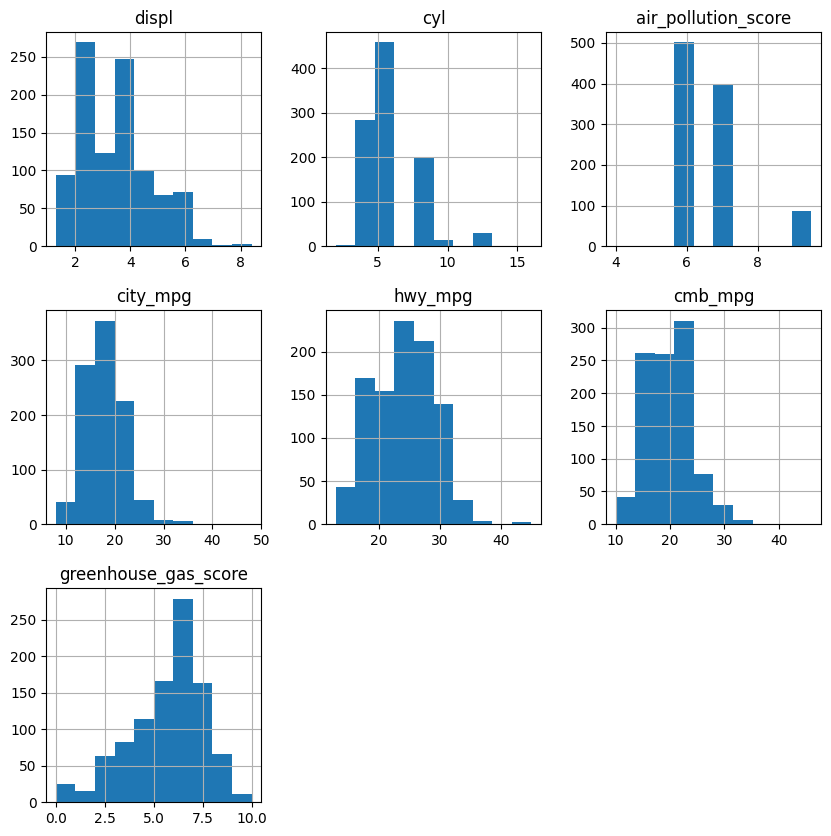

In [787]:
df_08.hist(figsize=(10,10))


array([[<Axes: title={'center': 'displ'}>,
        <Axes: title={'center': 'cyl'}>,
        <Axes: title={'center': 'air_pollution_score'}>],
       [<Axes: title={'center': 'city_mpg'}>,
        <Axes: title={'center': 'hwy_mpg'}>,
        <Axes: title={'center': 'cmb_mpg'}>],
       [<Axes: title={'center': 'greenhouse_gas_score'}>, <Axes: >,
        <Axes: >]], dtype=object)

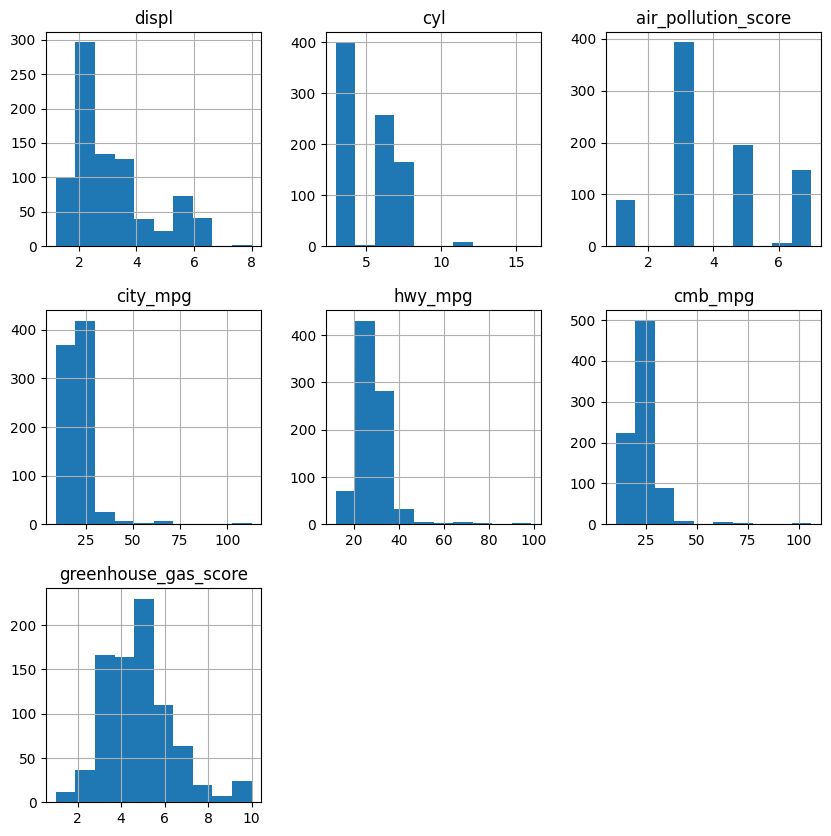

In [788]:
df_18.hist(figsize=(10,10))


* Throught the plot, we can see from 2008 to 2018, combined_mpg becomes more screwed to the right .
* Throught the plot, we can see from 2008 to 2018, the distributions of greenhouse gas score turns to be more screwed to left .

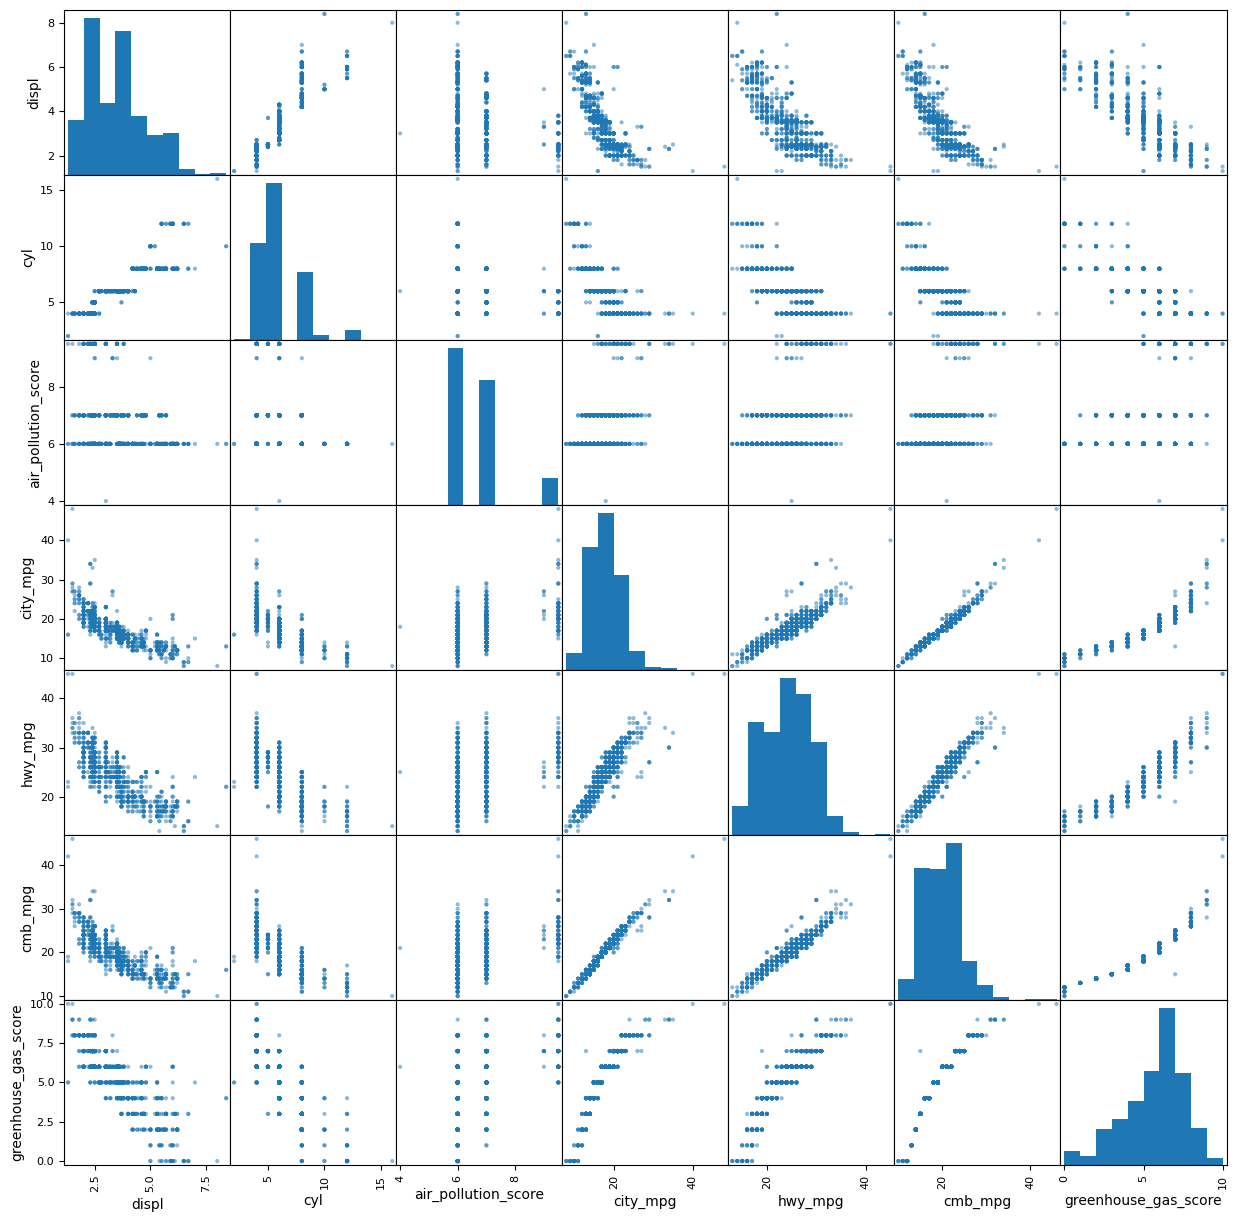

In [789]:
#Correlation among features in 2018 dataset
pd.plotting.scatter_matrix(df_08,figsize=(15,15));

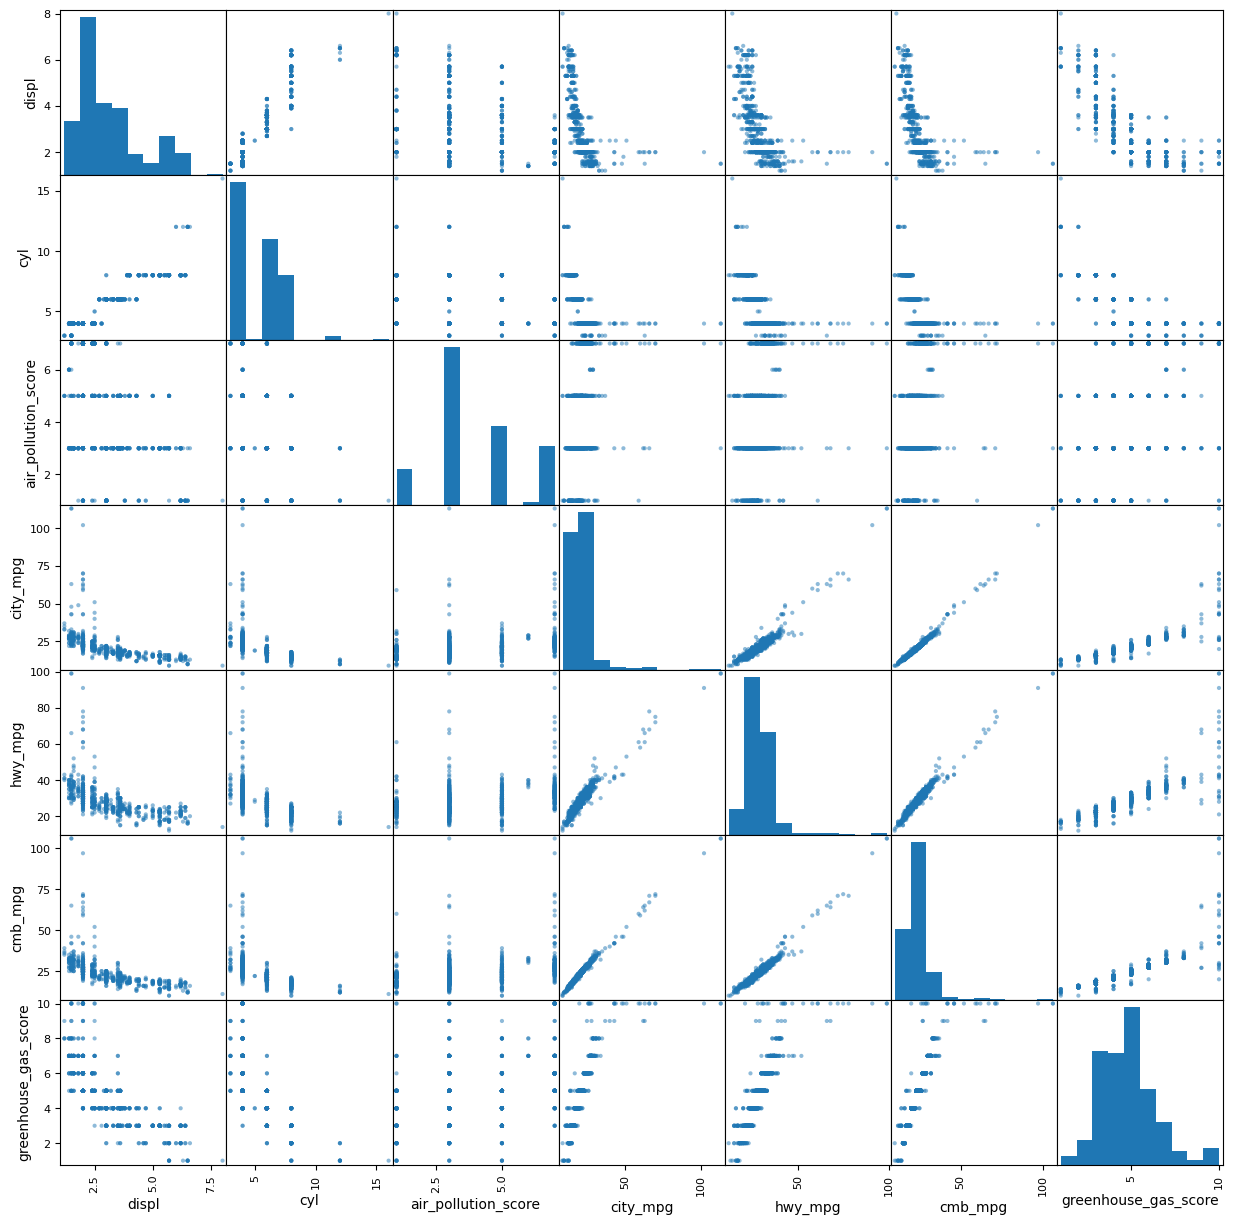

In [790]:
#Correlation among features in 2018 dataset
pd.plotting.scatter_matrix(df_18,figsize=(15,15));

Text(0.5, 1.0, 'The relationship Engine Size and Combined_mpg in 2008')

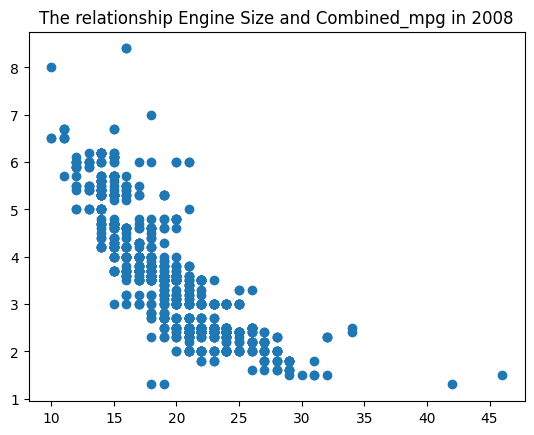

In [791]:
plt.scatter(x=df_08['cmb_mpg'].values, y=df_08['displ'].values);
plt.title('The relationship Engine Size and Combined_mpg in 2008')


Text(0.5, 1.0, 'The relationship Engine Size and Combined_mpg in 2008')

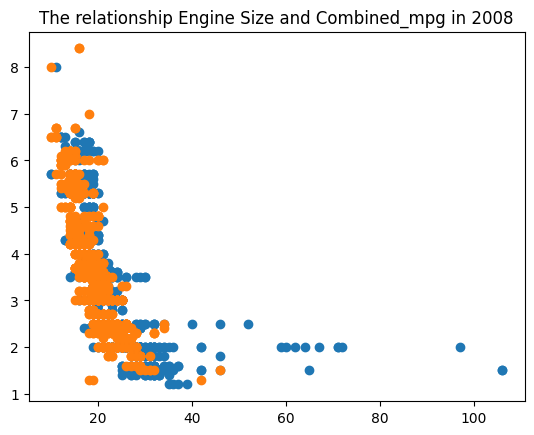

In [792]:
plt.scatter(data = df_18 , x='cmb_mpg' , y = 'displ') ;
plt.title('The relationship Engine Size and Combined_mpg in 2018')

plt.scatter(x=df_08['cmb_mpg'].values, y=df_08['displ'].values)
plt.title('The relationship Engine Size and Combined_mpg in 2008')


No matter for year 2008 dataset or 2018 dataset, there is a very obvious negative coorelation between displacement and combined mpg.

Text(0.5, 1.0, 'Combined_mpg aginst Greenhouse_gas_score in 2008')

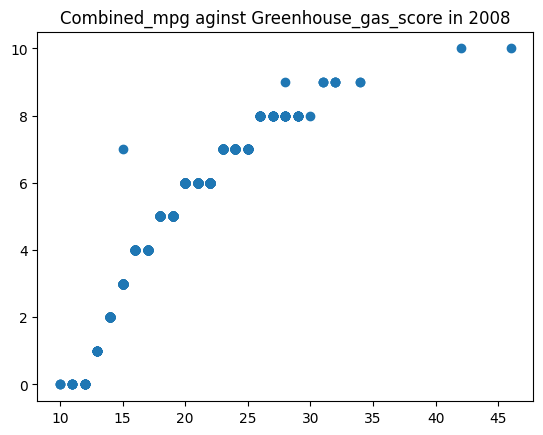

In [793]:
plt.scatter( data = df_08 , x='cmb_mpg' , y = 'greenhouse_gas_score') ;
plt.title('Combined_mpg aginst Greenhouse_gas_score in 2008')

Text(0.5, 1.0, 'Combined_mpg aginst Greenhouse_gas_score in 2018')

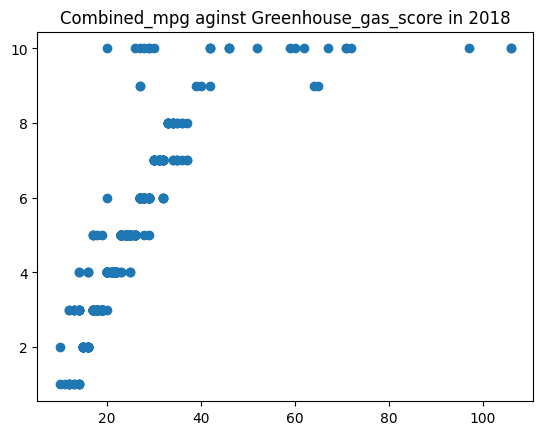

In [794]:
plt.scatter( data = df_18 , x='cmb_mpg' , y = 'greenhouse_gas_score') ;
plt.title('Combined_mpg aginst Greenhouse_gas_score in 2018')

No matter for year 2008 dataset or 2018 dataset, there is a very strong positive correlation between greenhouse gas score and combined mpg.

# Conclusions & Visuals:
The following are the 5 questions we raised at the beginning. Let's find the answers. 
* Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
* Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
* Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
* Q4: What features are associated with better fuel economy (mpg)?
* Q5:For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [795]:
# load datasets
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no
1,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,21.0,6,no
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no


In [796]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3.0,28.0,34.0,30.0,10,Yes
1,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7.0,27.0,31.0,29.0,10,Elite
2,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7.0,27.0,31.0,28.0,10,Elite
3,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3.0,25.0,29.0,27.0,9,Yes
4,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5.0,14.0,20.0,16.0,4,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [797]:
# q1: what are the alternative sources?  CNG and Ethanol and Electricity are all altenative sources
df_08['fuel'].value_counts()  # CNG and Ethanol

fuel
Gasoline    984
ethanol       1
gas           1
CNG           1
Name: count, dtype: int64

In [798]:
df_18['fuel'].value_counts()  # Electricity and Ethanol

fuel
Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: count, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity

In [799]:
# unique models used alternative sources of fuel in 2008 and 2018
al_08 = df_08.query('fuel in ["CNG","ethanol"]').model.nunique()
al_18 = df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique() 
# al_18

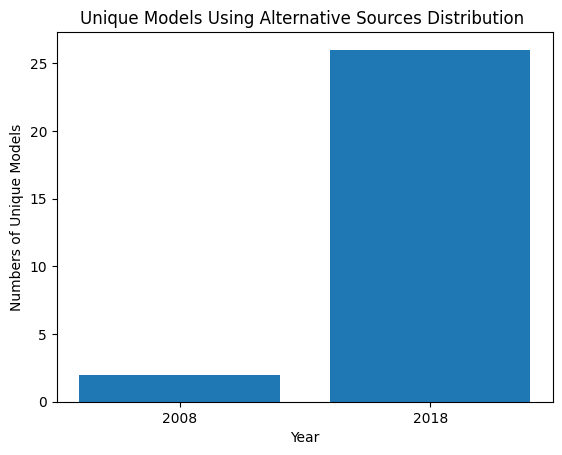

In [800]:
plt.bar(['2008','2018'],[al_08 , al_18] )
plt.title('Unique Models Using Alternative Sources Distribution ')
plt.xlabel('Year')
plt.ylabel('Numbers of Unique Models');

In [801]:
al_08 , al_18

(2, 26)

More unique models using alternative sources of fuel in 2018 compared to 2008. But that's look at the proportions

In [802]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [803]:
prop_08 = al_08/total_08
prop_18 = al_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

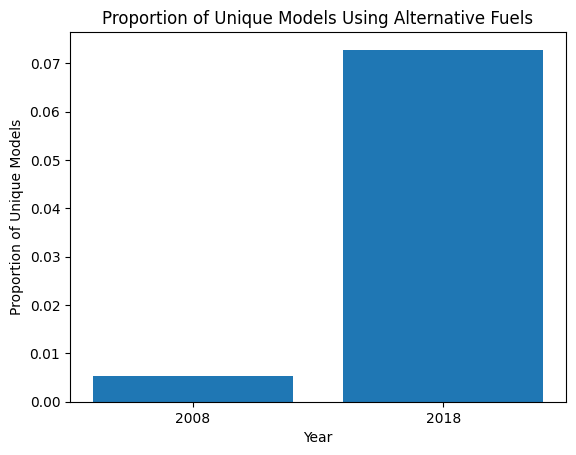

In [804]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

More unique models using alternative sources of fuel in 2018 compared to 2008 , increased by 6.75%

### Q2: How much have vehicle classes improved in fuel economy?¶

Let's look at the average fuel economy for each vehicle class for both years.

In [805]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [806]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [807]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

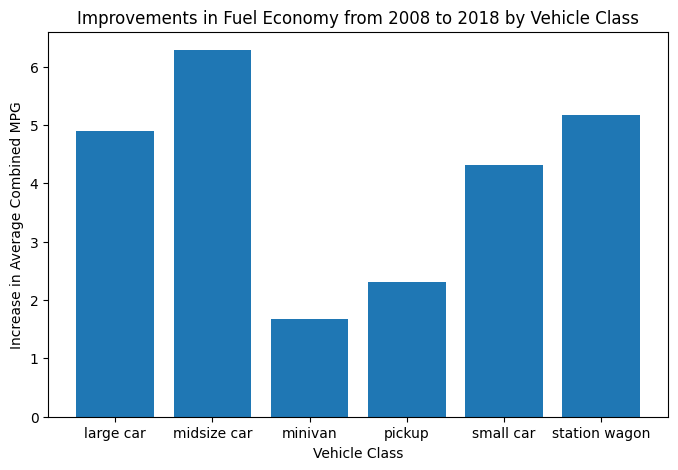

In [808]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?
We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [809]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [810]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [811]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [812]:
# smartway labels for 2018
df_18.smartway.unique()

array(['Yes', 'Elite', 'No'], dtype=object)

In [813]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [814]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?¶

Explore trends between cmb_mpg and the other features in this dataset, select all vehicles that have the top 50% fuel economy ratings to see the characteristics

In [815]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [816]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

Here are the steps for answering this question.

1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model
To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.

2. Create a new column, mpg_change, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [817]:
# load datasets
import pandas as pd
df_08 = pd.read_csv("clean_08.csv")
df_18 = pd.read_csv("clean_18.csv")

In [818]:
# Merge datasets
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10]+"_2008", inplace=True)
# merge datasets
df_combined = pd.merge(df_08,df_18,left_on='model_2008', right_on='model', how='inner')

In [819]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,29.0,25.0,5,No
1,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,30.0,25.0,5,No
2,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,...,Auto-9,2WD,Gasoline,small car,5.0,24.0,33.0,27.0,6,No
3,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,29.0,25.0,5,No
4,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,30.0,25.0,5,No


1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model


In [820]:
# To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.
model_mpg = df_combined.groupby('model').mean(numeric_only = True)[['cmb_mpg_2008', 'cmb_mpg']]
# get two columns' mean at the same time 
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


2. Create a new column, mpg_change, with the change in mpg . 
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [821]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


We can see the mpg change through mpg_change column above. Every vehicle varies . 

3. Find the vehicle that improved the most: 
Find the max mpg change, and then use query or indexing to see what model it is!

In [822]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [823]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


Model VOLVO XC 90 improves the most 

### Conclusion 5 : We can see the mpg change through mpg_change column above. Every vehicle varies. Among them, Model VOLVO XC 90 improves the most. 